In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [17]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [18]:
X.shape, y.shape

((50000, 15), (50000,))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [22]:
from sklearn import linear_model

In [23]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [24]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.13 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.15 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [25]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [26]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [27]:
w = np.zeros_like(X_train[0]) #weight vector 
b = 0  #intercept term
eta0  = 0.0001
alpha = 0.0001 
N = len(X_train)
#print(w)

In [28]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b)))

In [29]:
#referenced from https://www.kaggle.com/anandkenta/logistic-regression-l2-regularization-using-sgd
from tqdm import tqdm
def log_function(w,x,y,b):
    log_func_val = sigmoid(w,x,b)
    a = y*np.log10(log_func_val) 
    b =(1-y)*np.log10(1-log_func_val)
    output = -a-b
    return np.mean(output)
def trainSGD(x_train,y_train,x_test,y_test,eta0,alpha,epochs,w,b):
    log_funct = 1
    log_loss_val_test = []
    log_loss_val_train = []
    for epoch in range(0,epochs):
        for i in range(0,len(x_train)):
            y = y_train[i]
            x = x_train[i]
            w = ((1-eta0*(alpha/N))*w)+((eta0*x)*(y-sigmoid(w,x,b)))
            b = b+(eta0*(y-sigmoid(w,x,b)))
            
        log_funct_train = log_function(w, x_train, y_train,b)
        log_loss_val_train.append(log_funct_train)
        
        log_funct_test = log_function(w, x_test, y_test,b)
        log_loss_val_test.append(log_funct_test)
        
    return w, b, log_loss_val_train,log_loss_val_test
            

In [30]:
epochs = 10
w1,b1,logLoss,logLoss_test  = trainSGD(X_train,y_train,X_test,y_test, eta0,alpha, epochs, w, b)
print(w1,b1)
print(logLoss)
print(logLoss_test)

[-0.42315311  0.19095979 -0.14588118  0.33814991 -0.21196623  0.56525978
 -0.44538357 -0.09171679  0.21795314  0.16977398  0.19522044  0.00229554
 -0.07781461  0.33882618  0.02214234] -0.8500967712837225
[0.17546926223702466, 0.16868174436540248, 0.16639953379688374, 0.16537404901928135, 0.16486122004082468, 0.16459114506307726, 0.1644447987447564, 0.1643641152252568, 0.16431912310828212, 0.16429382915597823]
[0.17596687861916305, 0.1694098961177956, 0.1672141530442447, 0.16622329469756666, 0.16572403546384049, 0.16545876819806654, 0.1653136522207699, 0.16523283564551378, 0.16518727864511057, 0.1651613611606301]


In [36]:
w1-clf.coef_#b1-clf.intercept_ #difference between custom updated weights

array([[ 0.0002138 ,  0.00548413,  0.00270918, -0.00329416, -0.00377953,
         0.00509399,  0.00704126,  0.00237134,  0.00867994, -0.01106728,
        -0.00183147, -0.00192361,  0.00178909,  0.00029817, -0.00052487]])

In [37]:
b1-clf.intercept_ #difference between custom updated intercept term and clf.intercept_

array([0.00304153])

#### observation:
    Hence the result is matched with a sklearn

In [32]:
def pred(w,b, X):
    N = len(X)
    predict = []
    #sigmoid = 0
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

1.6978933333333335
1.6986400000000001


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, pred(w1,b1,X_train)))
print(accuracy_score(y_test, pred(w1,b1,X_test)))

0.83136
0.83376


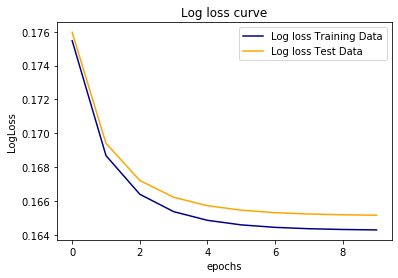

In [38]:
import matplotlib.pyplot as plt
plt.plot(np.array(logLoss), color='darkblue', label='Log loss Training Data')
plt.plot(np.array(logLoss_test), color='orange', label='Log loss Test Data')

plt.ylabel('LogLoss')
plt.xlabel('epochs')
plt.title('Log loss curve')
plt.legend()
plt.show()
